In [25]:
import numpy as np # linear algebra
import pandas as pd 

In [26]:
matches=pd.read_csv('./PSL_2016-2020.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 15 columns):
Team_1              126 non-null object
Team_2              126 non-null object
Team1_Code          126 non-null object
Team2_Code          126 non-null object
Season              126 non-null int64
venue               126 non-null object
id                  126 non-null int64
Win_By_Wkts         126 non-null int64
Win_By_Runs         125 non-null float64
toss_winner         126 non-null object
toss_winner_code    126 non-null object
toss_decision       126 non-null object
result              126 non-null object
winner              126 non-null object
winner_code         126 non-null object
dtypes: float64(1), int64(3), object(11)
memory usage: 14.9+ KB


In [27]:
matches.head()

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
0,ISLAMABAD UNITED,QUETTA GLADIATORS,IU,QG,2016,Dubai,1,8,0.0,ISLAMABAD UNITED,IU,field,normal,QUETTA GLADIATORS,QG
1,KARACHI KINGS,LAHORE QALANDARS,KK,LQ,2016,Dubai,2,7,0.0,KARACHI KINGS,KK,field,normal,KARACHI KINGS,KK
2,PESHAWAR ZALMI,ISLAMBAD UNITED,PZ,IU,2016,Dubai,3,0,24.0,PESHAWAR ZALMI,PZ,field,normal,PESHAWAR ZALMI,PZ
3,QUETTA GLADIATORS,KARACHI KINGS,QG,KK,2016,Dubai,4,8,0.0,QUETTA GLADIATORS,QG,field,normal,QUETTA GLADIATORS,QG
4,LAHORE QALANDARS,PESHAWAR ZALMI,LQ,PZ,2016,Dubai,5,9,0.0,PESHAWAR ZALMI,PZ,bat,normal,PESHAWAR ZALMI,PZ


In [28]:
matches.tail()

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
121,KARACHI KINGS,QUETTA GLADIATORS,KK,QG,2020,karachi,121,5,0.0,KARACHI KINGS,KK,field,normal,QUETTA GLADIATORS,QG
122,LAHORE QALANDARS,ISLAMABAD UNITED,LQ,IU,2020,karachi,122,1,0.0,LAHORE QALANDARS,LQ,field,normal,ISLAMABAD UNITED,IU
123,MULTAN SULTANS,PESHAWAR ZALMI,MS,PZ,2020,karachi,123,6,0.0,PESHAWAR ZALMI,PZ,bat,normal,MULTAN SULTANS,MS
124,ISLAMABAD UNITED,QUETTA GLADIATORS,IU,QG,2020,karachi,124,5,0.0,QUETTA GLADIATORS,QG,field,normal,QUETTA GLADIATORS,QG
125,MULTAN SULTANS,KARACHI KINGS,MS,KK,2020,karachi,125,0,52.0,KARACHI KINGS,KK,field,normal,MULTAN SULTANS,MS


In [29]:
matches[pd.isnull(matches['winner'])]

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code


In [31]:
encode = {'Team1_Code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6},
          'team2=_Code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6},
          'toss_winner_code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6},
          'winner_code': {'KK':1,'LQ':2,'MS':3,'IU':4,'PZ':5 ,'QG':6,'MT':7,'MA':10}}
matches.replace(encode,inplace=True)
matches.head()

,Team_1,Team_2,Team1_Code,Team2_Code,Season,venue,id,Win_By_Wkts,Win_By_Runs,toss_winner,toss_winner_code,toss_decision,result,winner,winner_code
0,ISLAMABAD UNITED,QUETTA GLADIATORS,4,QG,2016,Dubai,1,8,0.0,ISLAMABAD UNITED,4,field,normal,QUETTA GLADIATORS,6
1,KARACHI KINGS,LAHORE QALANDARS,1,LQ,2016,Dubai,2,7,0.0,KARACHI KINGS,1,field,normal,KARACHI KINGS,1
2,PESHAWAR ZALMI,ISLAMBAD UNITED,5,IU,2016,Dubai,3,0,24.0,PESHAWAR ZALMI,5,field,normal,PESHAWAR ZALMI,5
3,QUETTA GLADIATORS,KARACHI KINGS,6,KK,2016,Dubai,4,8,0.0,QUETTA GLADIATORS,6,field,normal,QUETTA GLADIATORS,6
4,LAHORE QALANDARS,PESHAWAR ZALMI,2,PZ,2016,Dubai,5,9,0.0,PESHAWAR ZALMI,5,bat,normal,PESHAWAR ZALMI,5


In [32]:
matches.describe()

,Team1_Code,Season,id,Win_By_Wkts,Win_By_Runs,toss_winner_code,winner_code
count,126.000000,126.000000,126.000000,126.000000,125.000000,126.000000,126.00000
mean,3.539683,2017.857143,63.206349,4.206349,8.392000,3.722222,4.15873
std,1.647547,1.237509,36.157504,5.228105,16.954349,1.773759,1.88218
min,1.000000,2016.000000,1.000000,0.000000,0.000000,1.000000,1.00000
25%,2.000000,2017.000000,32.250000,0.000000,0.000000,2.000000,3.00000
50%,4.000000,2018.000000,63.500000,5.000000,0.000000,4.000000,4.00000
75%,5.000000,2019.000000,93.750000,7.000000,7.000000,5.000000,6.00000
max,6.000000,2020.000000,125.000000,50.000000,67.000000,6.000000,10.00000


In [35]:
dicVal = encode['winner_code']
print(dicVal['KK']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search 

1
KK


In [36]:
matches = matches[['Team1_Code','Team2_Code','venue','toss_decision','toss_winner_code','venue','winner_code']]
matches.head()

,Team1_Code,Team2_Code,venue,toss_decision,toss_winner_code,venue,winner_code
0,4,QG,Dubai,field,4,Dubai,6
1,1,LQ,Dubai,field,1,Dubai,1
2,5,IU,Dubai,field,5,Dubai,5
3,6,KK,Dubai,field,6,Dubai,6
4,2,PZ,Dubai,bat,5,Dubai,5


In [37]:
df = pd.DataFrame(matches)
df.describe()

,Team1_Code,toss_winner_code,winner_code
count,126.000000,126.000000,126.00000
mean,3.539683,3.722222,4.15873
std,1.647547,1.773759,1.88218
min,1.000000,1.000000,1.00000
25%,2.000000,2.000000,3.00000
50%,4.000000,4.000000,4.00000
75%,5.000000,5.000000,6.00000
max,6.000000,6.000000,10.00000


In [39]:
temp1=df['toss_winner_code'].value_counts(sort=True)
temp2=df['winner_code'].value_counts(sort=True)
#'No of toss winners by each team'
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
PZ -> 33
KK -> 23
QG -> 22
IU -> 21
LQ -> 16
MS -> 11
No of match winners by each team
QG -> 29
PZ -> 28
IU -> 27
KK -> 18
MS -> 10
LQ -> 10
MA -> 2
MT -> 2


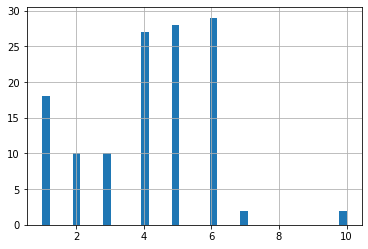

In [40]:
df['winner_code'].hist(bins=40)

Text(0.5, 1.0, 'Match winners')

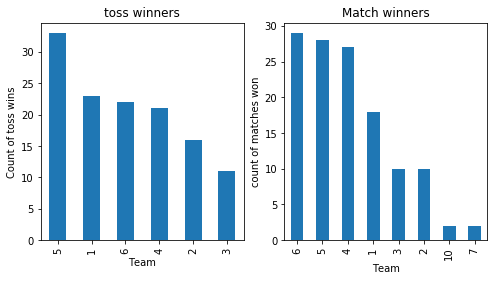

In [41]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [42]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 
    #find the null values in every column

Team1_Code          0
Team2_Code          0
venue               0
toss_decision       0
toss_winner_code    0
venue               0
winner_code         0
dtype: int64

In [48]:
df.shape


(126, 7)

In [45]:
#building predictive model
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

ValueError: bad input shape (126, 2)